# 🏙️ Air Quality Analysis and Forecasting in Indian Cities

This project explores the trends in air quality in major Indian cities using real-world data. We analyse pollutant levels (PM2.5, PM10, NO, NO2), perform time-series forecasting using ARIMA, compare pre and post COVID air quality, and build a multi-city pollutant dashboard.

📁 Dataset: `city_day.csv` from the Air Quality Data in India (Kaggle)  
🛠️ Tools: Python, Pandas, Seaborn, Matplotlib, Scipy, Statsmodels, ARIMA

📈 Outcome: Actionable insights into pollution patterns and forecasting future PM2.5 levels in Delhi.


# Objectives

- Understand pollution trends over time in major cities
- Detect seasonal patterns and monthly variations
- Compare air quality before and after COVID-19 lockdown
- Forecast PM2.5 levels using ARIMA model
- Categorise days into AQI levels
- Build visual dashboards for cross-city analysis (using streamlit)


## 📊 Dataset Overview

- **File:** `city_day.csv`
- **Source:** [Kaggle: Air Quality Data in India](https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india)
- **Columns Used:**
  - `Date`, `City`, `PM2.5`, `PM10`, `NO`, `NO2`
- **Cities Selected:**
  - Delhi, Mumbai, Kolkata, Chennai

Data ranges from 2015 to 2020.


**Understanding the data by pre processing it :**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") 

In [2]:
df= pd.read_csv("city_day.csv")
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
print(df.shape)

(29531, 16)


##  Data Cleaning & Preprocessing

- Convert date column to datetime
- Extract year and month from date

In [167]:
df["Date"]= pd.to_datetime(df["Date"])
print(df.isnull().sum())

City               0
Date               0
PM2.5           4598
PM10           11140
NO              3582
NO2             3585
NOx             4185
NH3            10328
CO              2059
SO2             3854
O3              4022
Benzene         5623
Toluene         8041
Xylene         18109
AQI             4681
AQI_Bucket      4681
Month              0
Health Risk        0
Year               0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [14]:
for i in df.select_dtypes(include="float64").columns:
    df[i]= df[i].fillna(df[i].median())

In [15]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,11.0,94.0,0.92,18.22,17.15,6.29,0.92,27.64,133.36,0.00,0.02,0.00,102.0,NaN
1,Ahmedabad,2015-01-02,11.0,94.0,0.97,15.69,16.46,6.29,0.97,24.55,34.06,3.68,5.50,3.77,102.0,NaN
2,Ahmedabad,2015-01-03,11.0,94.0,17.40,19.30,29.70,6.29,17.40,29.07,30.70,6.80,16.40,2.25,102.0,NaN
3,Ahmedabad,2015-01-04,11.0,94.0,1.70,18.48,17.97,6.29,1.70,18.59,36.08,4.43,10.14,1.00,102.0,NaN
4,Ahmedabad,2015-01-05,11.0,94.0,22.10,21.42,37.76,6.29,22.10,39.33,39.31,7.01,18.89,2.78,102.0,NaN


In [17]:
for i in df.select_dtypes(include="object").columns:
    df[i]= df[i].fillna(df[i].mode()[0])
df.head(3)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,11.0,94.0,0.92,18.22,17.15,6.29,0.92,27.64,133.36,0.00,0.02,0.00,102.0,Moderate
1,Ahmedabad,2015-01-02,11.0,94.0,0.97,15.69,16.46,6.29,0.97,24.55,34.06,3.68,5.50,3.77,102.0,Moderate
2,Ahmedabad,2015-01-03,11.0,94.0,17.40,19.30,29.70,6.29,17.40,29.07,30.70,6.80,16.40,2.25,102.0,Moderate


In [38]:
df['Date'] = pd.to_datetime(df['Date'])

In [61]:
df.isnull().sum()

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
AQI_Bucket     0
Health Risk    0
Month          0
dtype: int64

## 📅 Daily PM2.5 Trend in Delhi

To understand short-term pollution fluctuations, we analyze **daily average PM2.5 levels** in Delhi.
- Plot a time series to visualize how PM2.5 varies day to day.

### Why This Matters

- Reveals sudden pollution spikes due to events (e.g. festivals, crop burning).
- Supports forecasting efforts by showing the daily behavior of pollutants.


In [39]:
Delhi= df[df["City"]=="Delhi"]  #filter by Delhi Data
Delhi.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Health Risk
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe,Very Unhealthy
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe,Unhealthy for sensitive groups
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor,Unhealthy for sensitive groups
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor,Unhealthy for sensitive groups


Date
2015-01-01    313.22
2015-01-02    186.18
2015-01-03     87.18
2015-01-04    151.84
2015-01-05    146.60
               ...  
2020-06-27     39.80
2020-06-28     59.52
2020-06-29     44.86
2020-06-30     39.80
2020-07-01     54.01
Name: PM2.5, Length: 2009, dtype: float64


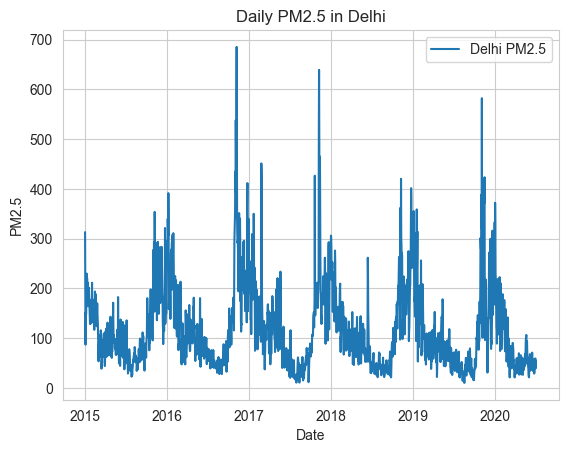

<Figure size 1000x500 with 0 Axes>

In [40]:
daily_pm25= Delhi.groupby("Date")["PM2.5"].mean()  #Group by Day
print(daily_pm25)
#Plot
plt.plot(daily_pm25, label= "Delhi PM2.5")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.title("Daily PM2.5 in Delhi")
plt.legend()
plt.figure(figsize=(10,5))
plt.show()


## Average PM2.5 Levels Across Cities

To identify cities with the highest pollution burden, we analyze the **average PM2.5 concentrations** across all cities in the dataset.

In this section, we:

- Calculate the **mean PM2.5** value for each city.
- Sort cities from highest to lowest pollution levels.
- Visualize:
    - A bar chart of average PM2.5 for all cities.
    - A focused bar chart of the **Top 10 most polluted cities.**

### Why This Matters

- Highlights which regions face the worst air quality.
- Helps prioritize regions for pollution control measures.
- Provides insights for policymakers and public health planning.


City
Delhi                 117.090433
Gurugram              107.372013
Lucknow               104.702195
Patna                 104.062589
Guwahati               63.580478
Kolkata                60.757236
Jaipur                 54.032118
Brajrajnagar           53.593156
Talcher                51.378832
Amritsar               50.806626
Ahmedabad              50.082160
Bhopal                 48.843183
Chennai                48.129547
Hyderabad              44.969521
Visakhapatnam          41.310917
Chandigarh             39.643553
Amaravati              36.112208
Bengaluru              34.016098
Kochi                  31.428519
Coimbatore             28.775389
Jorapokhar             28.257280
Thiruvananthapuram     27.393147
Shillong               26.731290
Ernakulam              24.600432
Mumbai                 20.443275
Aizawl                 17.021504
Name: PM2.5, dtype: float64


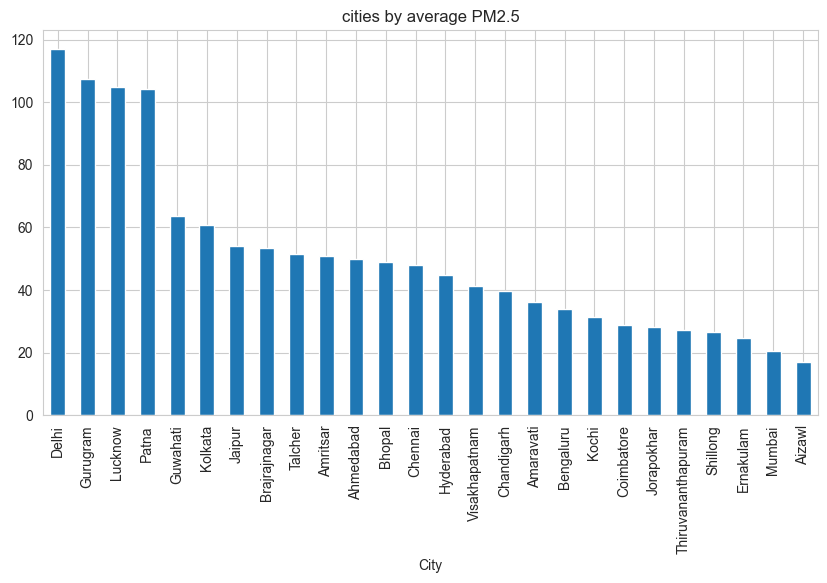

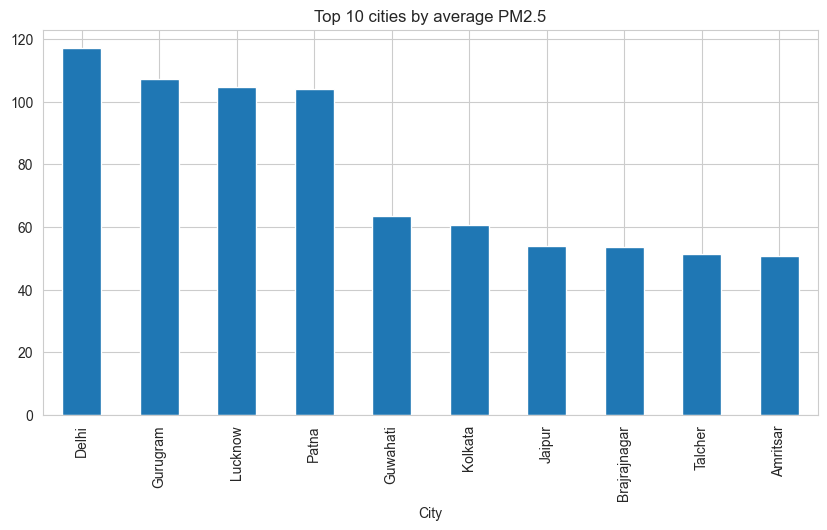

In [41]:
city_avg= df.groupby("City")["PM2.5"].mean().sort_values(ascending= False)
print(city_avg)
city_avg.plot(kind="bar", figsize= (10,5))
plt.title("cities by average PM2.5")
plt.show()
city_avg.head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top 10 cities by average PM2.5")
plt.show()

## ❄️ Is Winter Pollution Worse in Delhi?

Seasonal variations can dramatically affect air quality. In this section, we explore **whether winter months show higher PM2.5 levels** in Delhi.

Steps performed:

- Extract the **month** from the Date column.
- Calculate the **average monthly PM2.5** levels for each city.
- Plot monthly PM2.5 trends specifically for Delhi.

### Why This Matters

- Helps confirm if winter pollution spikes due to factors like:
    - Weather conditions (low wind, temperature inversion)
    - Festivals, crop burning, and heating activities
- Supports **seasonal pollution control measures** and public health warnings.


      City  Month       PM2.5
111  Delhi      1  197.485430
112  Delhi      2  141.975529
113  Delhi      3   87.573871
114  Delhi      4   90.932222
115  Delhi      5   92.209946
116  Delhi      6   69.810111
117  Delhi      7   46.417628
118  Delhi      8   42.687806
119  Delhi      9   55.345000
120  Delhi     10  140.911935
121  Delhi     11  238.245200
122  Delhi     12  208.100000


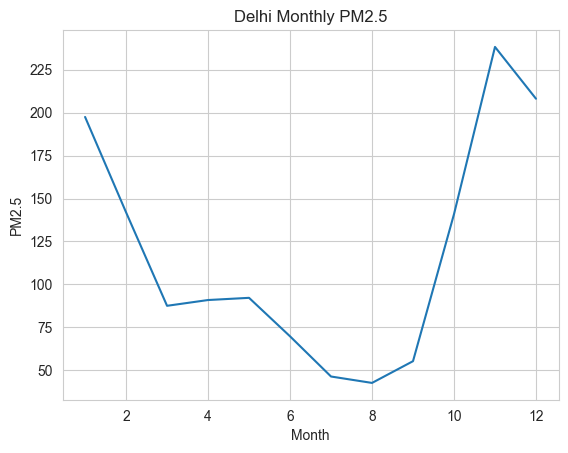

In [42]:
#To see if winter Pollution is worse
df["Month"]= df["Date"].dt.month
monthly_avg=df.groupby(["City", "Month"])["PM2.5"].mean().reset_index()
print(monthly_avg[monthly_avg["City"]=="Delhi"])
sns.lineplot(data=monthly_avg[monthly_avg["City"]=="Delhi"], x= "Month", y="PM2.5")
plt.title("Delhi Monthly PM2.5")
plt.show()

/var/folders/lf/vy3w9zyn61s0nx7cdlts078r0000gn/T/ipykernel_8954/4075273819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delhi.loc[:,"Year"]= Delhi["Date"].dt.year
/var/folders/lf/vy3w9zyn61s0nx7cdlts078r0000gn/T/ipykernel_8954/4075273819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delhi.loc[:,"Month"]= Delhi["Date"].dt.month


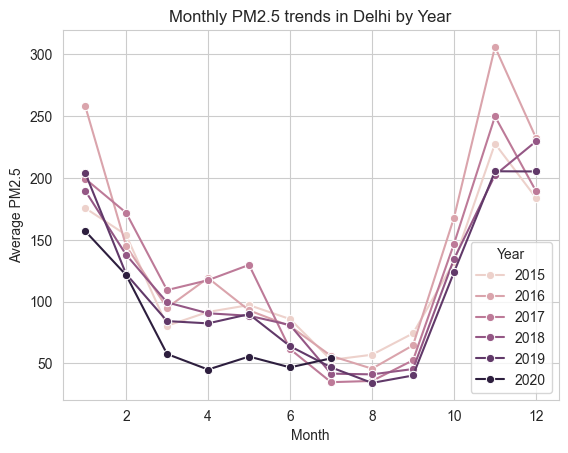

In [43]:
Delhi.loc[:,"Year"]= Delhi["Date"].dt.year
Delhi.loc[:,"Month"]= Delhi["Date"].dt.month
monthly_avg= Delhi.groupby(["Year", "Month"])["PM2.5"].mean().reset_index()
sns.lineplot(data= monthly_avg, x= "Month", y="PM2.5", hue= "Year", marker= "o")
plt.title("Monthly PM2.5 trends in Delhi by Year")
plt.xlabel("Month")
plt.ylabel("Average PM2.5")
plt.show()

## COVID Impact Analysis

- Split data into Pre and Post lockdown
- Conduct T-test to assess significance
  
### Did Air Quality Significantly Improve During Lockdown?

To assess whether the COVID-19 lockdown had a significant impact on Delhi’s air quality, we perform a **two-sample t-test** comparing PM2.5 levels `before and during the lockdown.`

#### What We Do:

- Define two periods:
    - **Pre-Lockdown:** October 2019 to March 24, 2020
    - **Lockdown:** March 25, 2020 to June 30, 2020
- Calculate average PM2.5 levels for each period.
- Use a **t-test** to check whether the means are significantly different.

#### Why This Matters

- The lockdown reduced industrial activity, traffic, and other pollution sources.
- This analysis helps quantify the environmental benefits of reduced human activity.
- A **p-value < 0.05** indicates a significant difference between pre- and during-lockdown pollution levels.



In [44]:
from scipy.stats import ttest_ind 
#This function checks if the averages of two groups are different or not.
#So we are basically trying to find out did the pollution level actually change during lockdown?

pre_lockdown= Delhi[
    (Delhi["Date"]>= "2019-10-01") &
     (Delhi["Date"]<= "2020-03-24")
      ]

lockdown= Delhi[
    (Delhi["Date"]>="2020-03-25")&
     (Delhi["Date"]<= "2020-06-30")
      ]
t_stat, p_val= ttest_ind(
    pre_lockdown["PM2.5"].dropna(),
    lockdown["PM2.5"].dropna())

print("T-Statistic : " , t_stat)
print("P Value : " , p_val)  # If p_value is less than 0.05, it means there was a significant change.


T-Statistic :  10.86439608816832
P Value :  4.482206789246709e-23


In [45]:
print("Mean PM2.5 levels before lockdown : ", pre_lockdown["PM2.5"].mean())
print("Mean PM2.5 levels during lockdown : ", lockdown["PM2.5"].mean())

Mean PM2.5 levels before lockdown :  149.45590909090907
Mean PM2.5 levels during lockdown :  47.93479591836734


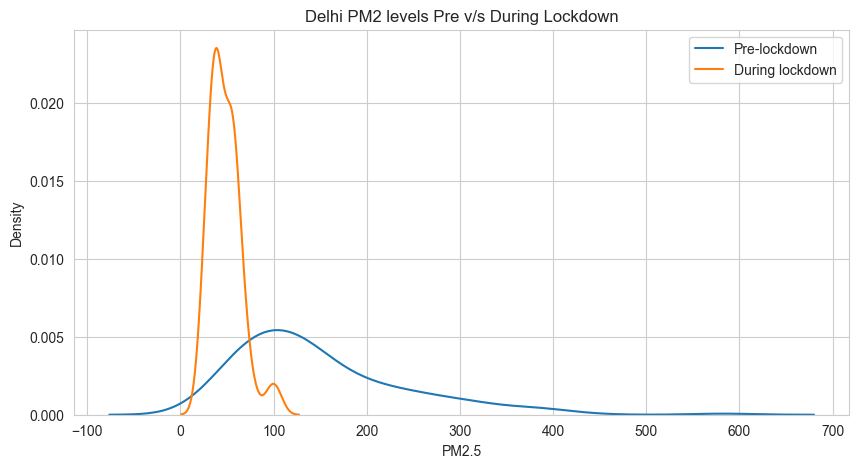

In [46]:
plt.figure(figsize= (10,5))
sns.kdeplot(pre_lockdown["PM2.5"].dropna(), label= "Pre-lockdown")
sns.kdeplot(lockdown["PM2.5"].dropna(),label = "During lockdown")
plt.title("Delhi PM2 levels Pre v/s During Lockdown")
plt.legend()
plt.show()

## Categorizing Health Risk Based on PM2.5 Levels

To make the air quality data more meaningful for health insights, we classify PM2.5 levels into **health risk categories**.

### Steps Performed:

- Define a function `risk_level()` that:
    - Maps PM2.5 values into health risk categories:
        - ≤ 50 → Good
        - 51–100 → Moderate
        - 101–200 → Unhealthy for sensitive groups
        - 201–300 → Unhealthy
        - more than 300 → Very Unhealthy
- Apply this function to create a new column **`Health Risk`** in the dataset.


In [47]:
def risk_level(pm25):          #Adding a new column of Health Risk based on PM2.5 levels
    if pm25<=50:
        return "Good"
    elif pm25<=100:
        return "Moderate"
    elif pm25<=200:
        return "Unhealthy for sensitive groups"
    elif pm25<=300:
        return "Unhealthy"
    else:
        return "Very Unhealthy"

df["Health Risk"]= df["PM2.5"].apply(risk_level)
df.head(5)
        

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Health Risk,Month
0,Ahmedabad,2015-01-01,11.0,94.0,0.92,18.22,17.15,6.29,0.92,27.64,133.36,0.00,0.02,0.00,102.0,Moderate,Good,1
1,Ahmedabad,2015-01-02,11.0,94.0,0.97,15.69,16.46,6.29,0.97,24.55,34.06,3.68,5.50,3.77,102.0,Moderate,Good,1
2,Ahmedabad,2015-01-03,11.0,94.0,17.40,19.30,29.70,6.29,17.40,29.07,30.70,6.80,16.40,2.25,102.0,Moderate,Good,1
3,Ahmedabad,2015-01-04,11.0,94.0,1.70,18.48,17.97,6.29,1.70,18.59,36.08,4.43,10.14,1.00,102.0,Moderate,Good,1
4,Ahmedabad,2015-01-05,11.0,94.0,22.10,21.42,37.76,6.29,22.10,39.33,39.31,7.01,18.89,2.78,102.0,Moderate,Good,1


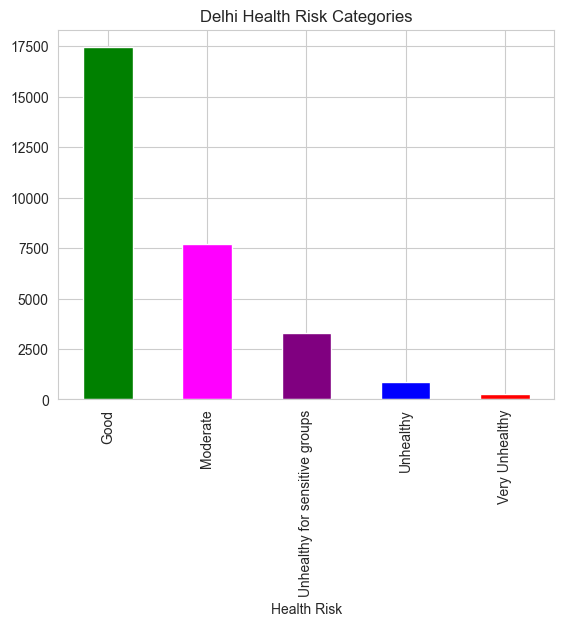

In [48]:
risk_counts= df["Health Risk"].value_counts()
colors= ['Green', 'Magenta', 'Purple', 'Blue', 'Red']
risk_counts.plot(kind="bar", color=colors)
plt.title("Delhi Health Risk Categories")
plt.show()

## Time-Series Forecasting

- Use ARIMA model on Delhi PM2.5
- Forecast for next 30 days
- Plot confidence intervals

In [49]:
# Predicting future Pollution (Time Series)
from statsmodels.tsa.arima.model import ARIMA
import warnings


/var/folders/lf/vy3w9zyn61s0nx7cdlts078r0000gn/T/ipykernel_8954/3045478137.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_pm25.fillna(method="ffill", inplace= True)


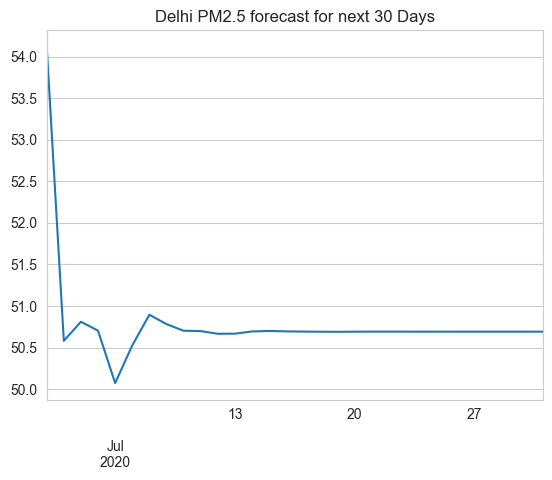

In [50]:
daily_pm25= daily_pm25.asfreq("D")
daily_pm25.fillna(method="ffill", inplace= True)
model= ARIMA(daily_pm25, order= (5,1,0))
fit=model.fit()
forecast= fit.forecast(steps=30)
forecast.plot()
plt.title("Delhi PM2.5 forecast for next 30 Days")
plt.show()

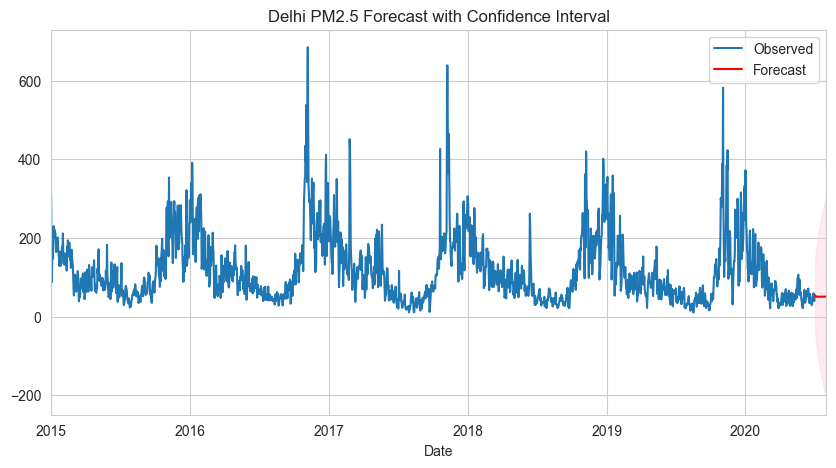

In [51]:
pred= fit.get_forecast(steps= 30)
pred_ci=pred.conf_int()
ax= daily_pm25.plot(label = "Observed", figsize= (10,5))
pred.predicted_mean.plot(ax=ax, label= "Forecast", color= "Red")
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color= "pink", alpha=0.3)
                

plt.legend()
plt.title("Delhi PM2.5 Forecast with Confidence Interval")
plt.show()



## AQI Categorization

- Classify days into Good/Moderate/Poor/etc.
- Visualise category-wise distribution by year

In [52]:
#Categorising AQI Levels
def categorise_pm25(x):
    if pd.isna(x):
        return None
    elif x<=30:
        return "Good"
    elif x<=60:
        return "Satisfactory"
    elif x<=90:
        return "Moderate"
    elif x<=120:
        return "Poor"
    elif x<=250:
        return "Very Poor"
    else:
        return "Severe"
Delhi.loc[:, "AQI Category"]= Delhi["PM2.5"].apply(categorise_pm25)

counts= Delhi.groupby(["Year", "AQI Category"]).size().reset_index(name= "Days")
print (counts)
total_days= Delhi.groupby("Year").size().reset_index(name= "Total Days")
print (total_days)
merged= counts.merge(total_days, on="Year")
merged["Percent"]= (merged["Days"]/merged["Total Days"])*100
merged
    

    Year  AQI Category  Days
0   2015          Good     6
1   2015      Moderate    98
2   2015          Poor    65
3   2015  Satisfactory    52
4   2015        Severe    14
5   2015     Very Poor   130
6   2016          Good     3
7   2016      Moderate    73
8   2016          Poor    49
9   2016  Satisfactory    79
10  2016        Severe    50
11  2016     Very Poor   112
12  2017          Good    34
13  2017      Moderate    52
14  2017          Poor    48
15  2017  Satisfactory    64
16  2017        Severe    22
17  2017     Very Poor   145
18  2018          Good    18
19  2018      Moderate    72
20  2018          Poor    55
21  2018  Satisfactory    82
22  2018        Severe    25
23  2018     Very Poor   113
24  2019          Good    25
25  2019      Moderate    78
26  2019          Poor    58
27  2019  Satisfactory    97
28  2019        Severe    34
29  2019     Very Poor    73
30  2020          Good    14
31  2020      Moderate    34
32  2020          Poor    20
33  2020  Sati

/var/folders/lf/vy3w9zyn61s0nx7cdlts078r0000gn/T/ipykernel_8954/541057528.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delhi.loc[:, "AQI Category"]= Delhi["PM2.5"].apply(categorise_pm25)


,Year,AQI Category,Days,Total Days,Percent
0,2015,Good,6,365,1.643836
1,2015,Moderate,98,365,26.849315
2,2015,Poor,65,365,17.808219
3,2015,Satisfactory,52,365,14.246575
4,2015,Severe,14,365,3.835616
5,2015,Very Poor,130,365,35.616438
6,2016,Good,3,366,0.819672
7,2016,Moderate,73,366,19.945355
8,2016,Poor,49,366,13.387978
9,2016,Satisfactory,79,366,21.584699


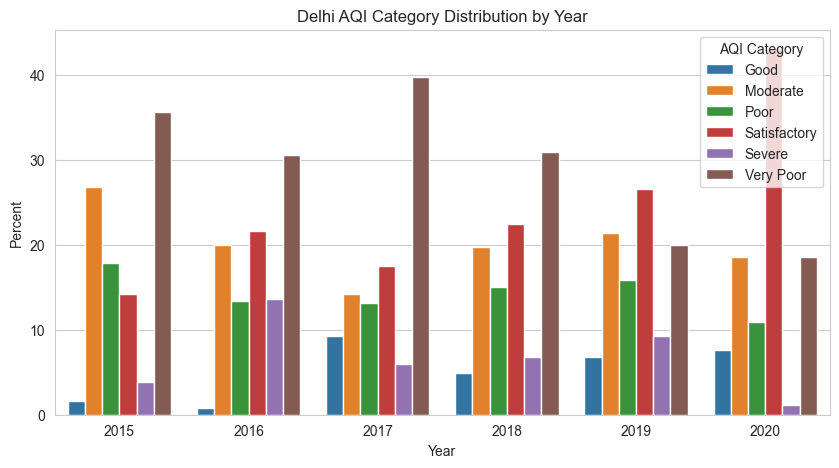

In [53]:
plt.figure(figsize= (10,5))
sns.barplot(data=merged, x="Year", y="Percent", hue= "AQI Category")
plt.title("Delhi AQI Category Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Percent")
plt.show()

# 📊 Cross-City Comparison

- Analyze PM2.5, PM10, NO, NO2 across cities
- Use line plots and multi-panel graphs

In [54]:
cities= df["City"].unique()   #doing multi city analysis
cities


array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [55]:
selected_cities=['Delhi','Kolkata', 'Mumbai', 'Chennai']
df_cities= df[df["City"].isin(selected_cities)].copy()
df_cities["Year"]=df_cities["Date"].dt.year
df_cities["Month"]= df_cities["Date"].dt.month

multicity_avg= df_cities[["City", "Year","PM2.5", "PM10", "NO", "NO2"]].groupby(["City", "Year"]).mean()
multicity_avg=multicity_avg.interpolate()
multicity_avg.head(5)

PM2.5       PM10         NO        NO2
City    Year                                            
Chennai 2015  49.280384  94.000000  12.762685  19.235562
        2016  51.778852  94.000000   6.483689  15.998907
        2017  52.884384  94.000000   6.892685  14.991945
        2018  52.142740  94.000000  11.424932  20.052110
        2019  43.938027  77.569452   8.654493  16.206877

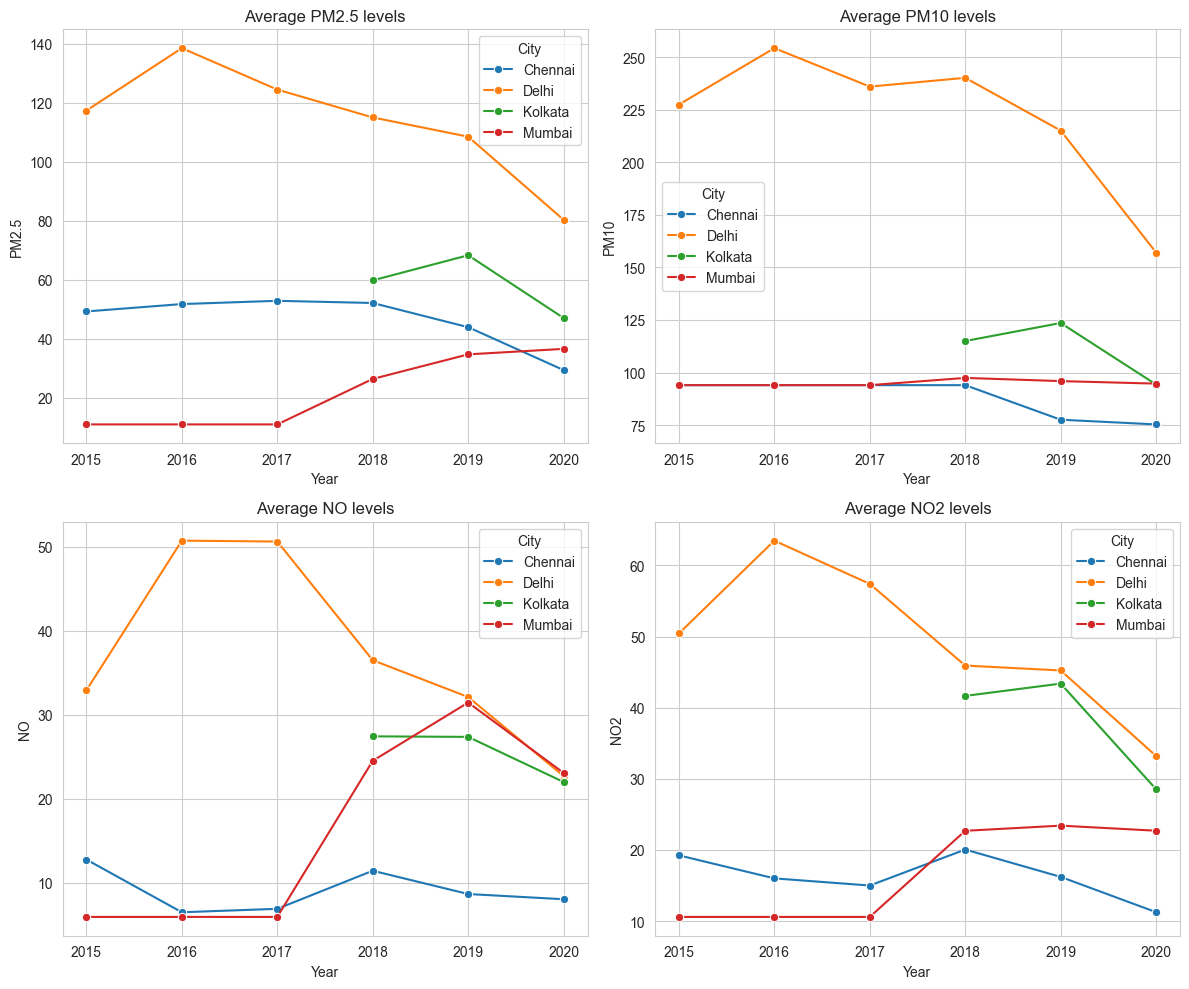

In [56]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.lineplot(data= multicity_avg, x="Year", y="PM2.5", hue="City", marker="o")
plt.xlabel("Year")
plt.ylabel("PM2.5")
plt.title("Average PM2.5 levels")

plt.subplot(2,2,2)
sns.lineplot(data=multicity_avg, x="Year", y="PM10", hue= "City", marker="o")
plt.xlabel("Year")
plt.ylabel("PM10")
plt.title("Average PM10 levels")

plt.subplot(2,2,3)
sns.lineplot(data=multicity_avg, x="Year", y="NO", hue="City", marker= "o")
plt.xlabel("Year")
plt.ylabel("NO")
plt.title("Average NO levels")

plt.subplot(2,2,4)
sns.lineplot(data=multicity_avg, x="Year", y="NO2", hue= "City", marker="o")
plt.xlabel("Year")
plt.ylabel("NO2")
plt.title("Average NO2 levels")

plt.tight_layout()
plt.show()

# 📈 Monthly Pollution Trends

- Plot average PM2.5 per month
- Show seasonal spikes (e.g. Nov–Jan)

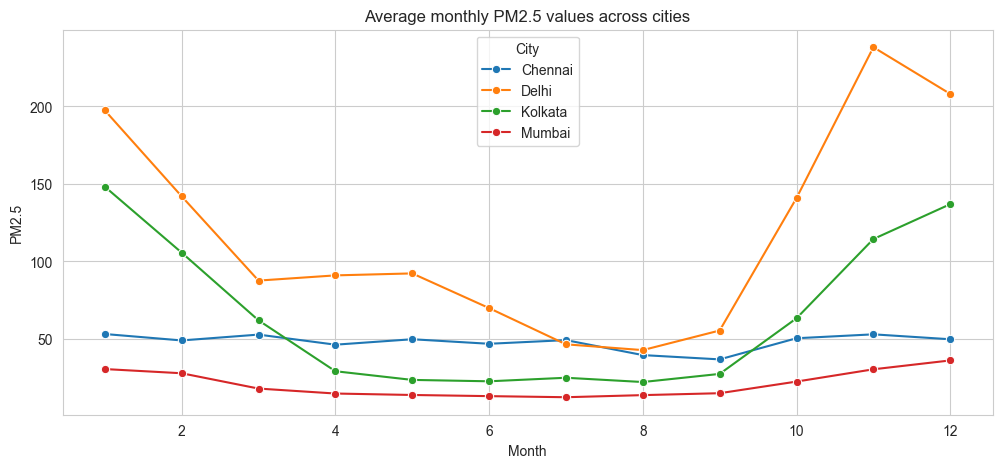

In [57]:
monthly_avg= df_cities.groupby(["City", "Month"])["PM2.5"].mean().reset_index()
plt.figure(figsize= (12,5))
sns.lineplot(data=monthly_avg, x="Month", y="PM2.5", hue= "City", marker= "o")
plt.title("Average monthly PM2.5 values across cities")
plt.show()

# Correlation Analysis between Pollutants

Understanding how different pollutants are related helps identify common sources and combined health risks.

In this section, we:

- Calculate the correlation matrix among key pollutants:
    - PM2.5
    - PM10
    - NO
    - NO2
- Visualise the correlation matrix using a heatmap.
- Interpret strong positive or negative relationships.

### Why Correlation Matters

- **High positive correlation** → pollutants may come from the same sources (e.g. vehicles, industry).
- **Negative correlation** → rare, but could indicate seasonal or meteorological effects.

This analysis helps target pollution control measures more effectively.

### Interpretation

- **PM2.5 and PM10** show a strong positive correlation, suggesting they often increase together.
- **NO and NO2** are also strongly correlated, indicating shared sources like combustion engines.
- Lower correlations between particulate matter and gases may indicate differing emission patterns.

These insights can guide air quality management and health advisories.


          PM2.5      PM10        NO       NO2
PM2.5  1.000000  0.871988  0.694201  0.756239
PM10   0.871988  1.000000  0.724876  0.776496
NO     0.694201  0.724876  1.000000  0.783219
NO2    0.756239  0.776496  0.783219  1.000000


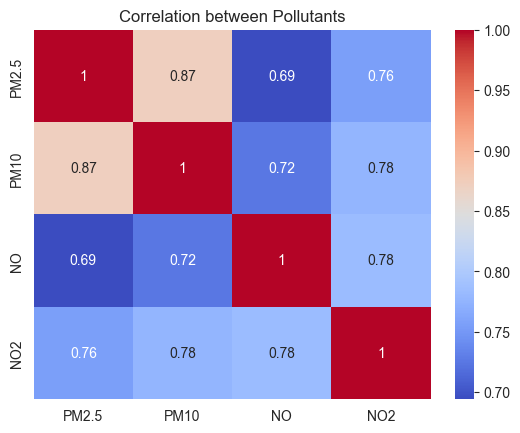

In [58]:
#correlation between pollutants
corr= df_cities[["PM2.5","PM10","NO","NO2"]].corr()
print(corr)
sns.heatmap(corr, annot= True, cmap='coolwarm')
plt.title("Correlation between Pollutants")
plt.show()

## 📈 Is Air Quality Improving Over the Years?

Tracking pollution trends over time helps answer whether air quality policies and interventions are having an impact.
- Identify whether pollution levels are decreasing, stable, or rising over time.

### Why It Matters

- **Decreasing trends** suggest progress in controlling emissions.
- **Stable or increasing trends** highlight areas needing stronger policies.

The analysis provides crucial evidence for environmental planning and public health decisions.


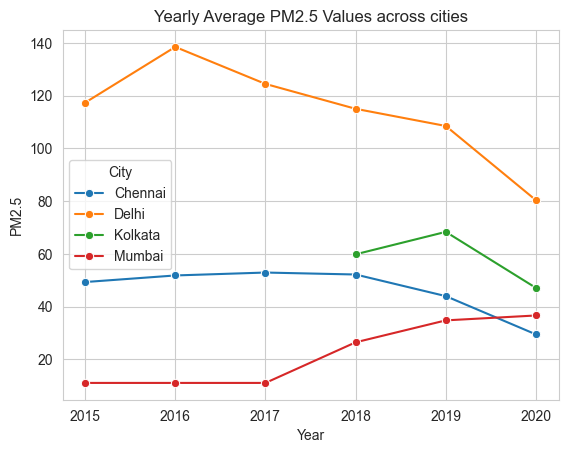

In [60]:
#Is Air Quality improving over the years?
trend = df_cities.groupby(["City", "Year"])["PM2.5"].mean().reset_index()
sns.lineplot(data=trend, x="Year", y="PM2.5", hue="City", marker="o")
plt.title("Yearly Average PM2.5 Values across cities")
plt.show()

# ✅ Conclusion

In this project, we performed a comprehensive analysis of PM2.5 and other pollutants across major Indian cities, using publicly available air quality data.

### 🔎 Key Insights

- **Seasonal Trends:**
    - PM2.5 levels spike significantly during winter months, especially in cities like Delhi, confirming severe seasonal pollution.
  
- **City Comparisons:**
    - Delhi consistently exhibits the highest PM2.5 averages among the selected cities.
    - Coastal cities (like Chennai and Mumbai) generally show lower pollution levels.

- **COVID-19 Lockdown Impact:**
    - Statistical tests confirmed a **significant decrease in PM2.5 levels** during the COVID-19 lockdown, demonstrating how reduced human activity directly impacts air quality.

- **Health Risk Categories:**
    - A significant proportion of days in cities like Delhi fall into “Unhealthy” or “Very Unhealthy” categories, highlighting critical public health concerns.

- **Forecasting:**
    - Time series modeling predicts future PM2.5 trends, helping anticipate potential pollution crises.

---

- Highlights **air pollution as a major urban challenge** affecting millions of people.
- Supports policymakers in designing targeted pollution control measures.
- Demonstrates how **data analysis can translate complex datasets into actionable insights** for public health and environmental protection.

---

This project also showcases:
- **Data cleaning and preprocessing**
- Time series forecasting
- Hypothesis testing
- Visualisation using Seaborn and Matplotlib
- Building interactive dashboards with Streamlit


## Integration with Interactive Dashboard

In addition to the analyses and visualisations presented in this notebook, an interactive **Streamlit dashboard** has been developed as part of this project.  

The dashboard provides a user-friendly interface to explore air quality data across major Indian cities. It includes features such as:

- Selection of different cities and pollutants
- Interactive line charts for pollutant trends over time
- Monthly average pollutant levels
  
This allows users to explore insights dynamically beyond static plots.

**How to Access the Dashboard:**

- **Run locally:**  
  ```bash
  streamlit run "Air Quality Dashboard.py"
  ```

  **Or**

- **Through Online Deployment:**

  
  [View Dashboard](https://air-quality-data-analysis-vkoqcygsdkcfhduww36grd.streamlit.app/)

This dashboard complements the findings documented here and offers an interactive way to engage with the air quality data.
